In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

from matplotlib.ticker import MaxNLocator, AutoLocator
from matplotlib import rcParams
rcParams['axes.labelsize'] = 9
rcParams['xtick.labelsize'] = 9
rcParams['ytick.labelsize'] = 9
rcParams['legend.fontsize'] = 9
rcParams['font.family'] = 'sans-serif'
rcParams['grid.color'] = 'k'
rcParams['grid.linewidth'] = 0.2
my_locator = MaxNLocator(6)
singlecolsize = (3.3522420091324205, 2.0717995001590714)
doublecolsize = (7.500005949910059, 4.3880449973709)
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [13]:
pzdata = pd.read_csv("/srv/one/hperk4/eco_resb_decals_photoz.csv")['e_tab_corr'].to_numpy() / 3e5

In [16]:
files = [ff for ff in os.listdir('../data/subvolumes/') if ff.endswith('.hdf5')]
files = [ff for ii,ff in enumerate(files) if (ii%2)==0]
vols = pickle.load(open('../data/subvolumes/volumes_h0.7.pkl','rb'))
limits = pickle.load(open('../data/subvolumes/completeness_h0.7.pkl','rb'))
grpndict={}

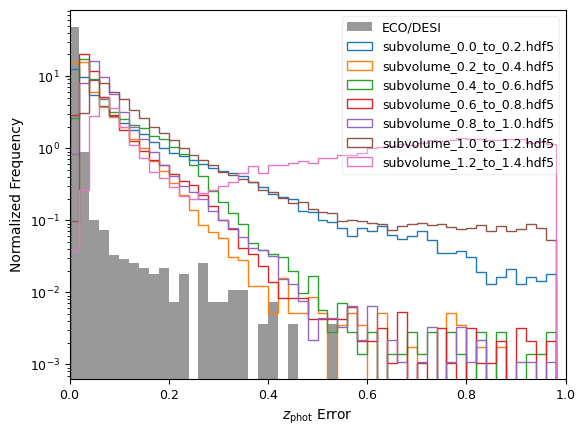

In [65]:
plt.figure()
bv = np.arange(0,1,0.02)
plt.hist(pzdata,bins=bv, color='gray',density=True,alpha=0.8, label='ECO/DESI')
dsets = []

for ff in files:
    df=pd.read_hdf('../data/subvolumes/'+ff)
    idx = df[df.combinedzspecerr<1].index
    df.loc[idx,'combinedzspecerr'] = 100/3e5
    df.loc[:,'bestoverallredshifterr'] = np.where(~np.isnan(df.combinedzspec), df.combinedzspecerr, df.zphoterrcorr)
    df = df[(df.absrmag<=limits[ff]) & ~pd.isna(df.bestoverallredshift) & ~pd.isna(df.bestoverallredshifterr) & (df.bestoverallredshift>0.01) & (df.Qz<1)]#.head(5000)
    plt.hist(df.zphoterrcorr, bins=bv, density=True, histtype='step', label=ff)
    dsets.append(df.zphoterrcorr.to_numpy())
plt.yscale('log')
plt.legend(loc='upper right', fontsize=9, framealpha=0.3)
plt.xlim(0,1)
plt.xlabel(r"$z_{\rm phot}$ Error")
plt.ylabel("Normalized Frequency")
plt.show()

<Figure size 640x480 with 0 Axes>

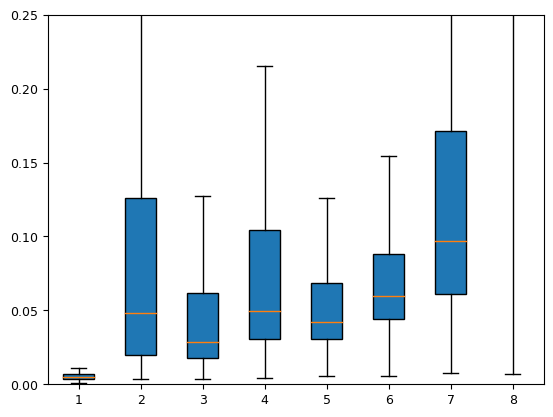

In [63]:
plt.figure()
datasets = [pzdata] + dsets

fig,ax = plt.subplots()
bplot = ax.boxplot(datasets, patch_artist=True, showfliers=False)
plt.ylim(0,0.25)
plt.show()

In [69]:
np.median([np.median(ds_) for ds_ in datasets[1:]])

0.049406077607929116